# 5003 ABP 
**Auther: Li,Qichao**<br>
**ID: 20787264**<br>
**Date: 25 Nov 2021**

## Part(A) Autocorrelation of the direction of motion

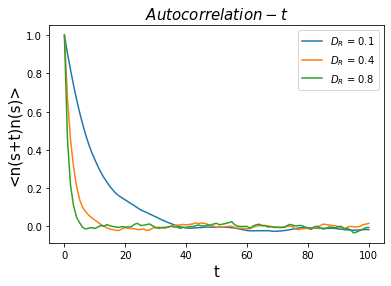

In [247]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
def func(x,a):
    return np.exp(-np.array(x)/a)
import warnings
warnings.filterwarnings("ignore")
# from scipy.optimize import curve_fit
D_r_all = [0.01*i for i in range(100)]
tor = []
# def func(x,a):
#     return np.exp(-np.array(x)/a)
for D_r in D_r_all:
### set the variance of the Gaussian white noise and create a list of it
    sigma = 1
    noise = np.random.normal(0,sigma,10000)
### initialize t,theta
    theta = 0
    t = 0
    all_theta = [0]
    all_t = [0]
### set dt 
    delta = 1

### use the theta(t+delta) = theta(t) + sqrt(2*D)*noise*delta
    for no in noise:
        theta+=no*np.sqrt(2*D_r)*delta
        t+=delta
### memory all the records each time
        all_theta.append(theta)
        all_t.append(t)
### calculate the direction of motion each time 
    n_t = [np.cos(all_theta),np.sin(all_theta)]
### set the number of time to calculate the autocorrelation of the direction of motion
    T = 9900
    Autocorr_val = []
    Autocorr_t = []
### calculate the autocorrelation as a function of t
    for k in range(len(all_t)-T):
        tmp = sum(n_t[0][k:k+T]*n_t[0][:T]+n_t[1][k:k+T]*n_t[1][:T])/T
        Autocorr_val.append(tmp)
        Autocorr_t.append(all_t[k])
    if D_r == 0.8:
        plt.plot(Autocorr_t,Autocorr_val,label = "$D_R$ = 0.8")
        plt.xlabel("t",fontsize = 15)
        plt.ylabel("<n(s+t)n(s)>",fontsize = 15)
        plt.legend()
        plt.show()
    if D_r == 0.4:
        plt.plot(Autocorr_t,Autocorr_val,label = "$D_R$ = 0.4")
        plt.xlabel("t",fontsize = 15)
        plt.ylabel("<n(s+t)n(s)>",fontsize = 15)
#         plt.legend()
#         plt.show()
    if D_r == 0.1:
        plt.plot(Autocorr_t,Autocorr_val,label = "$D_R$ = 0.1")
        plt.xlabel("$t$",fontsize = 15)
        plt.ylabel("$<n(s+t)n(s)>$",fontsize = 15)
        plt.title("$Autocorrelation-t$",fontsize = 15)
#         plt.legend()
#         plt.show()
    fittedParameters, pcov = curve_fit(func, Autocorr_t, Autocorr_val, 1)
    tor.append(fittedParameters[0])

**Figure.1 The autocorrelation of the direction of motion with time increasing in different $D_R$**

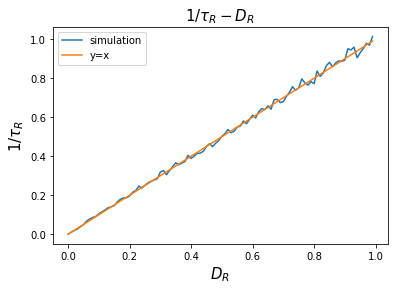

In [248]:
plt.plot(D_r_all,1/np.array(tor),label = "simulation")
plt.plot(D_r_all,D_r_all,label="y=x")
plt.xlabel("${D_R}$",fontsize = 15)
plt.ylabel("${1/τ_R}$",fontsize = 15)
plt.title("${1/τ_R-D_R}$",fontsize = 15)
plt.legend()
plt.show()

**Figure.2 The dependence of $τ_R$ on $D_R$**

## Part(B) Effective diffusion coefficient in two dimensions

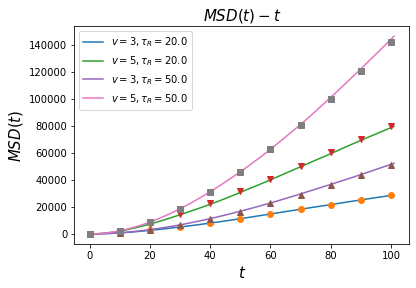

In [354]:
D_r_all = [0.05,0.02]
v_all = [3,5]
# D_v_pairs = [()]
MSD = []
samples = 1000
sign_n = -1
sign = ['o','v','^','s','P','*','d','h']
for D_r in D_r_all:
    for v in v_all:
        sign_n+=1
    ### set the variance of the Gaussian white noise and create a list of it
        msd =[]
        for sam in range(samples):
            sd = [0]
            sigma = 1
            noise = np.random.normal(0,sigma,1000)
        ### initialize t,theta
            theta = 0
            t = 0
            x = 0
            y = 0
            all_x = [0]
            all_y = [0]

            all_theta = [0]
            all_t = [0]
        ### set dt 
            delta = 1

        ### use the theta(t+delta) = theta(t) + sqrt(2*D)*noise*delta
            for no in noise:
                x+=np.cos(theta)*v*delta
                y+=np.sin(theta)*v*delta
                theta+=no*np.sqrt(2*D_r)*delta
                t+=delta
        ### memory all the records each time
                all_theta.append(theta)
                all_t.append(t)
                all_x.append(x)
                all_y.append(y)
                sd.append(x**2+y**2)
            msd.append(np.array(sd))
        msd = sum(msd)/samples
        MSD.append(msd/(2*v**2/D_r))
        plt.plot(all_t[:102],msd[:102],label = f"$v = {v},τ_R = {round(1/D_r,2)}$")
        plt.plot(all_t[:102],2*v**2/D_r*(np.array(all_t)+1/D_r*(np.exp(-np.array(all_t)*D_r)-1))[:102],lw = 0,marker=sign[sign_n],markevery = 10)
        plt.legend()
plt.title("$MSD(t)-t$",fontsize = 15)
plt.xlabel("$t$",fontsize = 15)
plt.ylabel("$MSD(t)$",fontsize = 15)
plt.show()
# MSD_ave = sum(MSD)/len(MSD)

**Figure3. Numerically calculated (lines) and theoretical (symbols) MSD for an active Brownian particle with $ν = 3,5$ and $τ_R = 20,50$**

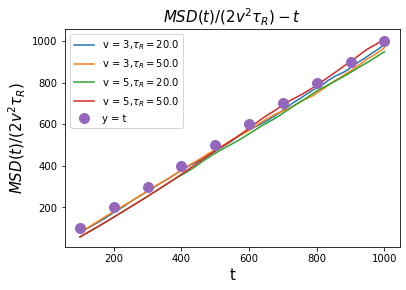

In [369]:
label = []
for v in v_all:
    for D_r in D_r_all:
        la = f"v = {v},$τ_R ={round(1/D_r,2)}$"
        label.append(la)
# MSD_ave = sum(MSD)/len(MSD)
for i in range(len(MSD)):
    plt.plot(all_t[100:],MSD[i][100:],label = label[i])
plt.plot(all_t[100:],np.array(all_t)[100:],marker = 'o',markevery = 100,markersize = 10,lw=0,label = "y = t")
plt.xlabel("t",fontsize = 15)
plt.ylabel("$MSD(t)/(2v^2τ_R)$",fontsize = 15)
plt.title("$MSD(t)/(2v^2τ_R) -t$",fontsize = 15)
plt.legend()
plt.show()

**Figure4. Relationship between $MSD$ and $2ν^2 τ_R t$ as $t≫τ_R$**